<a href="https://colab.research.google.com/github/SarahFeanor/Portfolio-DataScience/blob/main/Detec%C3%A7%C3%A3o_de_fraude.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<sub> 🔗[GitHub](https://github.com/SarahFeanor) | [LinkedIn](https://www.linkedin.com/in/sarahfrezende/) | [Portfólio](https://github.com/sarahfeanor/Portfolio-DataScience) | [Medium](https://medium.com/@sarahfrezende)  </sub>

📂 Projeto | Data Science | By Sarah Faria Rezende

---

# **Protegendo Transações Financeiras: Detecção de Fraudes em Cartões de Crédito**

O combate às fraudes em cartões de crédito constitui uma das principais preocupações para as instituições financeiras. Essas ocorrências podem acarretar prejuízos consideráveis tanto para os consumidores quanto para as próprias instituições, destacando-se como um desafio contínuo. A complexidade reside no fato de que os fraudadores estão em busca constante de métodos para contornar os sistemas de segurança.

Segundo dados da Serasa Experian, somente no Brasil, aproximadamente 12,1 milhões de pessoas foram alvo de algum tipo de fraude financeira no último ano. Isso resultou em um prejuízo de 1,8 bilhão de reais somente nos últimos 12 meses.

A tarefa de detectar fraudes em transações de cartões de crédito é intrincada. Transações legítimas e fraudulentas podem ser semelhantes, o que complica o processo de diferenciação. Além disso, as fraudes podem ocorrer em diferentes faixas de valores e locais, dificultando a identificação de um padrão. Esse cenário pode levar a erros de detecção, incluindo tanto falsos positivos (blocos preventivos em transações legítimas) quanto falsos negativos (não identificação de transações fraudulentas).

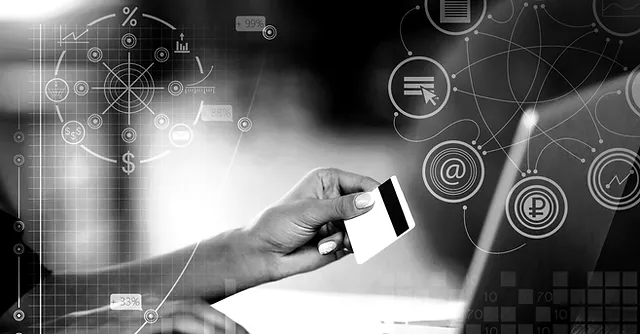

# **Objetivo do Projeto**

O propósito deste projeto é conduzir uma análise exploratória dos dados referentes a transações de cartões de crédito, bem como desenvolver modelos de machine learning que tenham a capacidade de identificar transações fraudulentas com elevada precisão. Para alcançar esse objetivo, serão empregadas técnicas avançadas de análise de dados e machine learning, com a finalidade de identificar padrões e anomalias nos dados. Adicionalmente, serão aplicadas abordagens de balanceamento de dados. Uma parte crucial do processo consistirá em avaliar a eficácia dos modelos construídos, tanto em termos de sua precisão na detecção de fraudes quanto em relação à minimização de falsos positivos.

# **Importação dos Dados**

Os dados utilizados neste projeto provêm de diversas empresas de cartões de crédito na Europa. O conjunto de dados abrange transações financeiras que ocorreram durante um intervalo de dois dias, incluindo 492 casos de fraudes em meio a quase 290 mil transações. É importante observar que o conjunto de dados é altamente desbalanceado, com as fraudes representando somente 0,17% do total.

Outro ponto a se destacar é que as características do conjunto de dados são todas numéricas e foram submetidas a um processo de descaracterização para salvaguardar questões de privacidade e segurança. Por consequência, as colunas são denotadas por meio de nomenclaturas como v1, v2, v3, ..., v28.

In [2]:
# importar os pacotes necessários

import os
import graphviz
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn import tree
from sklearn.cluster import KMeans
from IPython.display import display
from sklearn.decomposition import PCA
from sklearn.tree import export_graphviz
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import ClusterCentroids
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

In [ ]:
pip install scikit-plot

In [4]:
import scikitplot as skplt

In [5]:
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"

# importar os dados para um dataframe
df = pd.read_csv(file_path)

# Análise dos Dados

O objetivo desta etapa é adquirir uma compreensão da estrutura dos dados.

## Dicionário das Variáveis

- **`Time`:** Representa o número de segundos decorridos entre a primeira transação e a transação atual.
- **`V1, V2, ..., V28`:** São colunas numéricas anônimas que contêm características transformadas por meio de PCA (Análise de Componentes Principais). Devido a questões de privacidade, o significado exato dessas características não pode ser revelado.
- **`Amount`:** Indica o valor da transação.
- **`Class:`** É a coluna de destino, assumindo o valor 0 para transações normais e 1 para transações fraudulentas.

# Análise Exploratória dos Dados

Nesta etapa de análise exploratória dos dados, vamos abordar os seguintes pontos:

- Compreensão geral das variáveis.
- Percentual de valores ausentes.
- Equilíbrio do conjunto de dados.
- Análise do intervalo de tempo entre as transações.
- Análise dos valores das transações.
- Relação entre o tempo e o valor das transações.

Para iniciar, vamos examinar as cinco primeiras entradas no conjunto de dados, a fim de obter uma visão inicial da estrutura dos dados.